In [1]:
from matplotlib import pyplot as plt
from matplotlib import cm
import pandas as pd
from pprint import pprint
from random import randint
import numpy as np
#import matplotlib as mpl
#mpl.rcParams['text.usetex'] = True
#mpl.rcParams['text.latex.unicode'] = True

blues = cm.get_cmap(plt.get_cmap('Blues'))
greens = cm.get_cmap(plt.get_cmap('Greens'))
reds = cm.get_cmap(plt.get_cmap('Reds'))
oranges = cm.get_cmap(plt.get_cmap('Oranges'))
purples = cm.get_cmap(plt.get_cmap('Purples'))
greys = cm.get_cmap(plt.get_cmap('Greys'))

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')

In [2]:
StHomoCampaigns_4StHomoResources = pd.read_csv('StHomoCampaigns_4StHomoResources.csv')

In [3]:
StHomoCampaigns_4StHomoResources = StHomoCampaigns_4StHomoResources.groupby(by=['planner','size'])
StHomoCampaigns_4StHomoResources_makespan_means = StHomoCampaigns_4StHomoResources.mean()
StHomoCampaigns_4StHomoResources_makespan_stds = StHomoCampaigns_4StHomoResources.std()

In [4]:
pprint(StHomoCampaigns_4StHomoResources_makespan_means/1000)

               makespan          time
planner size                         
GA      4        84.075  5.110463e-06
        8       181.575  3.086392e-05
        16      355.950  6.842074e-05
        32      673.050  1.568340e-04
        64     1302.525  3.712955e-04
        128    2541.150  7.064778e-04
        256    5006.625  7.727609e-04
        512    9886.575  2.102653e-03
        1024  19605.675  7.022565e-03
HEFT    4        75.000  2.490187e-08
        8       150.000  3.515577e-08
        16      300.000  5.771494e-08
        32      600.000  1.029410e-07
        64     1200.000  2.382283e-07
        128    2400.000  4.783840e-07
        256    4800.000  1.162554e-06
        512    9600.000  2.434492e-06
        1024  19200.000  5.348568e-06
RANDOM  4       159.825  2.052641e-08
        8       263.700  3.573823e-08
        16      463.200  7.445836e-08
        32      820.050  1.373935e-07
        64     1512.150  2.735255e-07
        128    2840.850  5.199738e-07
        256 

In [5]:
pprint(StHomoCampaigns_4StHomoResources_makespan_stds/1000)

                makespan          time
planner size                          
GA      4      24.471785  1.221921e-05
        8      37.047495  3.771686e-05
        16     32.835586  3.970663e-05
        32     33.501042  5.927489e-05
        64     46.153326  1.043748e-04
        128    63.142018  1.895927e-04
        256    93.991056  1.130706e-04
        512   123.594782  2.044415e-04
        1024  185.779933  5.929057e-04
HEFT    4       0.000000  5.771321e-09
        8       0.000000  1.031088e-08
        16      0.000000  1.267495e-08
        32      0.000000  2.367318e-08
        64      0.000000  7.081061e-08
        128     0.000000  1.397145e-07
        256     0.000000  3.690240e-06
        512     0.000000  6.611528e-06
        1024    0.000000  1.337618e-05
RANDOM  4      44.635599  6.183605e-09
        8      55.535071  1.002154e-08
        16     81.615998  2.626939e-08
        32    112.747326  5.997879e-08
        64    152.711159  8.922595e-08
        128   216.429826 

In [6]:
workflows_sizes = [4,8,16,32,64,128,256,512,1024]
min_vals = []
max_vals = []

for size in workflows_sizes:
    min_vals.append(75000 * size / 4)
    max_vals.append(75000 * size)
    
print(min_vals, max_vals)

[75000.0, 150000.0, 300000.0, 600000.0, 1200000.0, 2400000.0, 4800000.0, 9600000.0, 19200000.0] [300000, 600000, 1200000, 2400000, 4800000, 9600000, 19200000, 38400000, 76800000]


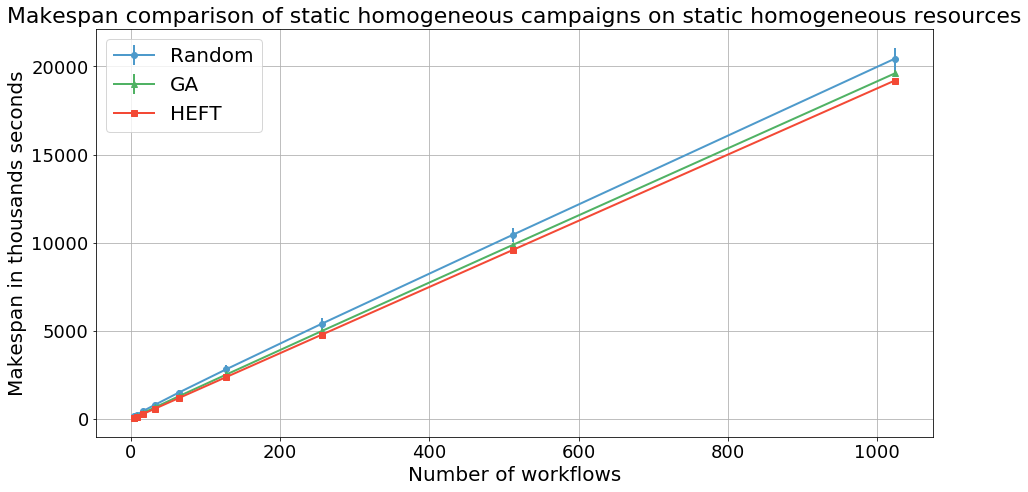

In [7]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(StHomoCampaigns_4StHomoResources_makespan_means.xs('RANDOM').index, StHomoCampaigns_4StHomoResources_makespan_means.xs('RANDOM')['makespan'].values,StHomoCampaigns_4StHomoResources_makespan_stds.xs('RANDOM')['makespan'].values, color=blues(150),marker='o',label='Random',linewidth=2)
_ = axis.errorbar(StHomoCampaigns_4StHomoResources_makespan_means.xs('GA').index, StHomoCampaigns_4StHomoResources_makespan_means.xs('GA')['makespan'].values,StHomoCampaigns_4StHomoResources_makespan_stds.xs('GA')['makespan'].values, color=greens(150),marker='^',label='GA',linewidth=2)
_ = axis.errorbar(StHomoCampaigns_4StHomoResources_makespan_means.xs('HEFT').index,StHomoCampaigns_4StHomoResources_makespan_means.xs('HEFT')['makespan'].values,marker='s',label='HEFT', color=reds(150),linewidth=2)
# _ = axis.fill_between(workflows_sizes, min_vals, max_vals, color=greens(250), alpha=0.2, label='RANDOM Max-Min')
# _ = axis.set_yscale('symlog')
_ = axis.set_ylabel('Makespan in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Number of workflows',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis.grid('on')
_ = axis.set_title('Makespan comparison of static homogeneous campaigns on static homogeneous resources', fontsize=22)
_ = axis.legend(fontsize=20)
fig.savefig('StHomoCampaigns_4StHomoResources.png',bbox_inches='tight')

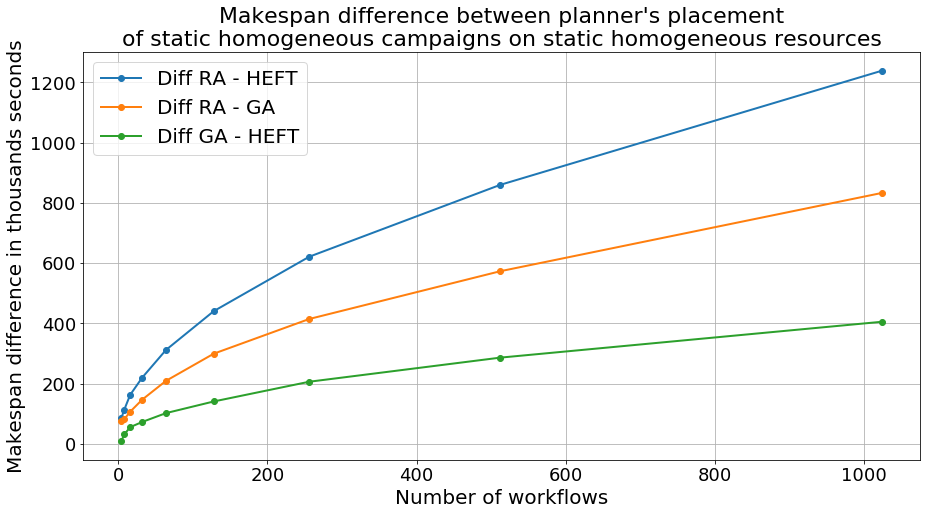

In [8]:
DiffStHomoCamp_4StHomoResHE = abs(StHomoCampaigns_4StHomoResources_makespan_means.xs('RANDOM')['makespan'].values - StHomoCampaigns_4StHomoResources_makespan_means.xs('HEFT')['makespan'].values)
DiffStHomoCamp_4StHomoResGA = abs(StHomoCampaigns_4StHomoResources_makespan_means.xs('RANDOM')['makespan'].values - StHomoCampaigns_4StHomoResources_makespan_means.xs('GA')['makespan'].values)
DiffStHomoCamp_4StHomoResHEGA = (StHomoCampaigns_4StHomoResources_makespan_means.xs('GA')['makespan'].values - StHomoCampaigns_4StHomoResources_makespan_means.xs('HEFT')['makespan'].values)
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.plot(StHomoCampaigns_4StHomoResources_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHE, marker='o',linewidth=2, label='Diff RA - HEFT')
_ = axis.plot(StHomoCampaigns_4StHomoResources_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResGA, marker='o',linewidth=2, label='Diff RA - GA')
_ = axis.plot(StHomoCampaigns_4StHomoResources_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHEGA, marker='o',linewidth=2, label='Diff GA - HEFT')
#_ = axis.set_yscale('symlog')
_ = axis.set_ylabel('Makespan difference in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Number of workflows',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis.grid('on')
_ = axis.legend(fontsize=20)
_ = axis.set_title("Makespan difference between planner's placement\nof static homogeneous campaigns on static homogeneous resources", fontsize=22)
fig.savefig('StHomoCampaigns_4StHomoResources_diff.png',bbox_inches='tight')

In [9]:
StHeteroCampaigns_4StHomoResources = pd.read_csv('StHeteroCampaigns_4StHomoResources.csv')
StHeteroCampaigns_4StHomoResources.reset_index(drop='index',inplace=True)
#locs = [0,20000,40000,60000,80000,100000,120000,140000,160000]
#operations = []
#for loc in locs:
#    wsize = StHeteroCampaigns_4StHomoResources.loc[loc]['size']
#    plan = eval(StHeteroCampaigns_4StHomoResources.loc[loc]['plan'])
#    num_oper = []
#    for i in range(wsize):
#        num_oper.append(plan[i][0]['num_oper'])
#    operations.append(num_oper)
#min_vals = []
#max_vals = []
#
#for opers in operations:
#    max_vals.append(sum(opers))
#    equid_dist1 = []
#    equid_dist2 = []
#    equid_dist3 = []
#    equid_dist4 = []
#    opers.sort()
#    for i in range(0,len(opers),4):
#        equid_dist1.append(opers[i + 0])
#        equid_dist2.append(opers[i + 1])
#        equid_dist3.append(opers[i + 2])
#        equid_dist4.append(opers[i + 3])
#    min_vals.append(max(sum(equid_dist1),sum(equid_dist2),sum(equid_dist3),sum(equid_dist4)))
#        
StHeteroCampaigns_4StHomoResources = StHeteroCampaigns_4StHomoResources.groupby(by=['planner','size'])
StHeteroCampaigns_4StHomoResources_makespan_means = StHeteroCampaigns_4StHomoResources.mean()
StHeteroCampaigns_4StHomoResources_makespan_stds = StHeteroCampaigns_4StHomoResources.std()
#print(min_vals, max_vals)

In [10]:
pprint(StHeteroCampaigns_4StHomoResources_makespan_means/1000)

                  makespan          time
planner size                            
GA      4        91.156773  5.700905e-05
        8       186.997926  8.806502e-06
        16      359.658626  4.863148e-06
        32      682.874794  7.888943e-06
        64     1304.037978  1.438422e-05
        128    2534.856739  3.327677e-05
        256    4980.646250  8.067164e-05
        512    9886.197282  2.196580e-04
        1024  19591.418304  6.737835e-04
HEFT    4        83.632362  3.165364e-08
        8       157.150562  4.809976e-08
        16      315.018877  8.389735e-08
        32      618.939137  1.599722e-07
        64     1216.707000  3.929837e-07
        128    2415.568856  7.718685e-07
        256    4810.185576  1.783201e-06
        512    9639.775935  3.794335e-06
        1024  19244.565032  7.860161e-06
RANDOM  4       162.754774  2.816057e-08
        8       273.113245  5.754137e-08
        16      483.526957  1.179748e-07
        32      852.230229  2.080338e-07
        64     1

In [11]:
pprint(StHeteroCampaigns_4StHomoResources_makespan_stds/1000)

                makespan          time
planner size                          
GA      4      20.009257  1.855413e-05
        8      30.657274  1.781949e-05
        16     26.151326  2.852221e-06
        32     30.976267  3.804872e-06
        64     44.749108  6.954177e-06
        128    62.422593  1.559962e-05
        256    87.191941  3.871942e-05
        512   124.534917  1.268013e-04
        1024  166.598629  3.684351e-04
HEFT    4       0.000000  9.780582e-09
        8       0.000000  1.012502e-08
        16      0.000000  1.761150e-08
        32      0.000000  3.464407e-08
        64      0.000000  1.041397e-07
        128     0.000000  1.989572e-07
        256     0.000000  3.701232e-06
        512     0.000000  6.921444e-06
        1024    0.000000  1.198119e-05
RANDOM  4      42.288295  8.900267e-09
        8      57.770918  1.604651e-08
        16     82.661951  4.263056e-08
        32    116.309910  6.296532e-08
        64    151.259841  2.835174e-07
        128   216.326809 

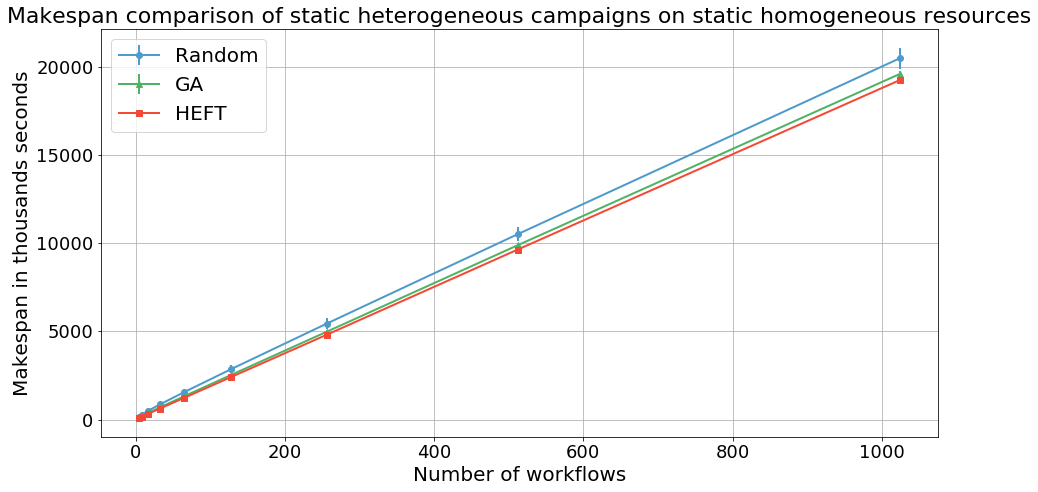

In [12]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(StHeteroCampaigns_4StHomoResources_makespan_means.xs('RANDOM').index,StHeteroCampaigns_4StHomoResources_makespan_means.xs('RANDOM')['makespan'].values,StHeteroCampaigns_4StHomoResources_makespan_stds.xs('RANDOM')['makespan'].values, color=blues(150),marker='o',label='Random',linewidth=2)
_ = axis.errorbar(StHeteroCampaigns_4StHomoResources_makespan_means.xs('GA').index, StHeteroCampaigns_4StHomoResources_makespan_means.xs('GA')['makespan'].values,StHeteroCampaigns_4StHomoResources_makespan_stds.xs('GA')['makespan'].values, color=greens(150),marker='^',label='GA',linewidth=2)
_ = axis.errorbar(StHeteroCampaigns_4StHomoResources_makespan_means.xs('HEFT').index,StHeteroCampaigns_4StHomoResources_makespan_means.xs('HEFT')['makespan'].values,marker='s',label='HEFT', color=reds(150),linewidth=2)
#_ = axis.fill_between(workflows_sizes,min_vals, max_vals, color=greens(250), alpha=0.2)
_ = axis.set_ylabel('Makespan in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Number of workflows',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis.grid('on')
_ = axis.set_title('Makespan comparison of static heterogeneous campaigns on static homogeneous resources', fontsize=22)
_ = axis.legend(fontsize=20)
fig.savefig('StHeteroCampaigns_4StHomoResources.png',bbox_inches='tight')

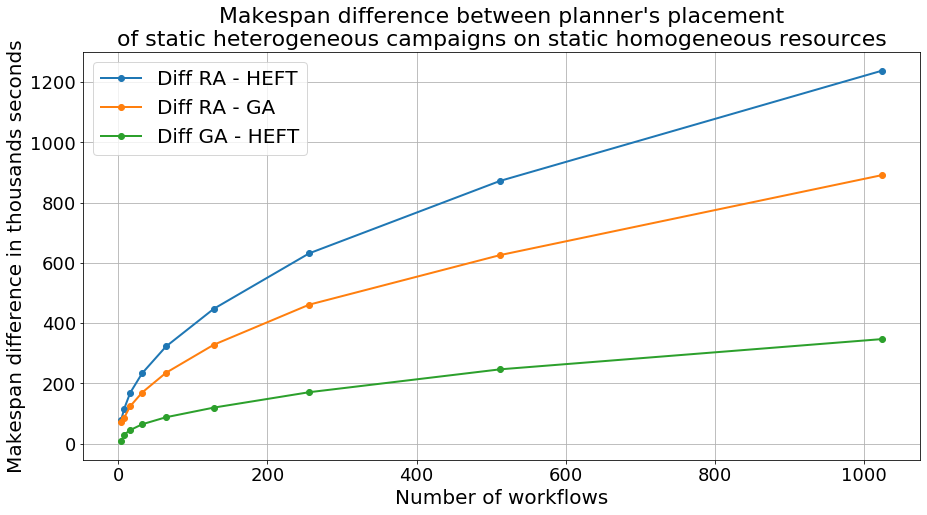

In [13]:
DiffStHeteroCamp_4StHomoResHE = abs(StHeteroCampaigns_4StHomoResources_makespan_means.xs('RANDOM')['makespan'].values - StHeteroCampaigns_4StHomoResources_makespan_means.xs('HEFT')['makespan'].values)
DiffStHeteroCamp_4StHomoResGA = abs(StHeteroCampaigns_4StHomoResources_makespan_means.xs('RANDOM')['makespan'].values - StHeteroCampaigns_4StHomoResources_makespan_means.xs('GA')['makespan'].values)
DiffStHeteroCamp_4StHomoResHEGA = (StHeteroCampaigns_4StHomoResources_makespan_means.xs('GA')['makespan'].values - StHeteroCampaigns_4StHomoResources_makespan_means.xs('HEFT')['makespan'].values)
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.plot(StHeteroCampaigns_4StHomoResources_makespan_means.xs('RANDOM').index, DiffStHeteroCamp_4StHomoResHE, marker='o',linewidth=2, label='Diff RA - HEFT')
_ = axis.plot(StHeteroCampaigns_4StHomoResources_makespan_means.xs('RANDOM').index, DiffStHeteroCamp_4StHomoResGA, marker='o',linewidth=2, label='Diff RA - GA')
_ = axis.plot(StHeteroCampaigns_4StHomoResources_makespan_means.xs('RANDOM').index, DiffStHeteroCamp_4StHomoResHEGA, marker='o',linewidth=2, label='Diff GA - HEFT')
#_ = axis.set_yscale('symlog')
_ = axis.set_ylabel('Makespan difference in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Number of workflows',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis.grid('on')
_ = axis.legend(fontsize=20)
_ = axis.set_title("Makespan difference between planner's placement\nof static heterogeneous campaigns on static homogeneous resources", fontsize=22)
fig.savefig('StHeteroCampaigns_4StHomoResources_diff.png',bbox_inches='tight')

In [14]:
StHeteroCampaigns_4St025HeteroResources = pd.read_csv('StHeteroCampaigns_4St025HeteroResources.csv')
StHeteroCampaigns_4St050HeteroResources = pd.read_csv('StHeteroCampaigns_4St050HeteroResources.csv')
StHeteroCampaigns_4St075HeteroResources = pd.read_csv('StHeteroCampaigns_4St075HeteroResources.csv')
StHeteroCampaigns_4St100HeteroResources = pd.read_csv('StHeteroCampaigns_4St100HeteroResources.csv')

In [15]:
StHeteroCampaigns_4St025HeteroResources                = StHeteroCampaigns_4St025HeteroResources.groupby(by=['planner','size'])
StHeteroCampaigns_4St025HeteroResources_makespan_means = StHeteroCampaigns_4St025HeteroResources.mean()
StHeteroCampaigns_4St025HeteroResources_stds           = StHeteroCampaigns_4St025HeteroResources.std()

StHeteroCampaigns_4St050HeteroResources                = StHeteroCampaigns_4St050HeteroResources.groupby(by=['planner','size'])
StHeteroCampaigns_4St050HeteroResources_makespan_means = StHeteroCampaigns_4St050HeteroResources.mean()
StHeteroCampaigns_4St050HeteroResources_stds           = StHeteroCampaigns_4St050HeteroResources.std()

StHeteroCampaigns_4St075HeteroResources                = StHeteroCampaigns_4St075HeteroResources.groupby(by=['planner','size'])
StHeteroCampaigns_4St075HeteroResources_makespan_means = StHeteroCampaigns_4St075HeteroResources.mean()
StHeteroCampaigns_4St075HeteroResources_stds           = StHeteroCampaigns_4St075HeteroResources.std()

StHeteroCampaigns_4St100HeteroResources                = StHeteroCampaigns_4St100HeteroResources.groupby(by=['planner','size'])
StHeteroCampaigns_4St100HeteroResources_makespan_means = StHeteroCampaigns_4St100HeteroResources.mean()
StHeteroCampaigns_4St100HeteroResources_stds           = StHeteroCampaigns_4St100HeteroResources.std()

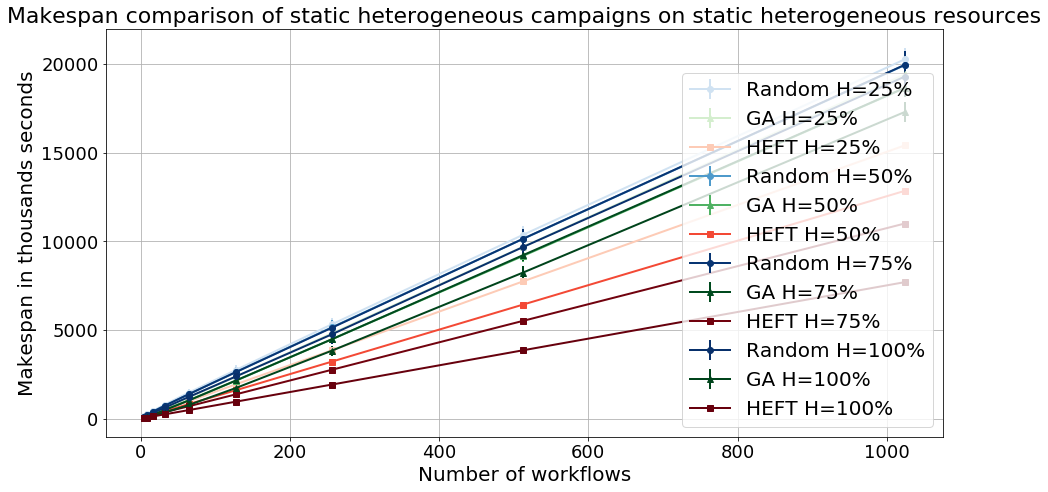

In [16]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('RANDOM').index,StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('RANDOM')['makespan'].values,StHeteroCampaigns_4St025HeteroResources_stds.xs('RANDOM')['makespan'].values,marker='o',color=blues(50),label='Random H=25%',linewidth=2)
_ = axis.errorbar(StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('GA').index, StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('GA')['makespan'].values,StHeteroCampaigns_4St025HeteroResources_stds.xs('GA')['makespan'].values,color=greens(50),marker='^',label='GA H=25%',linewidth=2)
_ = axis.errorbar(StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('HEFT').index,StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('HEFT')['makespan'].values,marker='s',label='HEFT H=25%', color=reds(50),linewidth=2)

_ = axis.errorbar(StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('RANDOM').index,StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('RANDOM')['makespan'].values,StHeteroCampaigns_4St050HeteroResources_stds.xs('RANDOM')['makespan'].values,color=blues(150),marker='o',label='Random H=50%',linewidth=2)
_ = axis.errorbar(StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('GA').index, StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('GA')['makespan'].values,StHeteroCampaigns_4St050HeteroResources_stds.xs('GA')['makespan'].values,color=greens(150),marker='^',label='GA H=50%',linewidth=2)
_ = axis.errorbar(StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('HEFT').index,StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('HEFT')['makespan'].values,marker='s',label='HEFT H=50%', color=reds(150),linewidth=2)

_ = axis.errorbar(StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('RANDOM').index,StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('RANDOM')['makespan'].values,StHeteroCampaigns_4St075HeteroResources_stds.xs('RANDOM')['makespan'].values,color=blues(250),marker='o',label='Random H=75%',linewidth=2)
_ = axis.errorbar(StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('GA').index, StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('GA')['makespan'].values,StHeteroCampaigns_4St075HeteroResources_stds.xs('GA')['makespan'].values,color=greens(250),marker='^',label='GA H=75%',linewidth=2)
_ = axis.errorbar(StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('HEFT').index,StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('HEFT')['makespan'].values,marker='s',label='HEFT H=75%', color=reds(250),linewidth=2)

_ = axis.errorbar(StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('RANDOM').index,StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('RANDOM')['makespan'].values,StHeteroCampaigns_4St100HeteroResources_stds.xs('RANDOM')['makespan'].values,color=blues(350),marker='o',label='Random H=100%',linewidth=2)
_ = axis.errorbar(StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('GA').index, StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('GA')['makespan'].values,StHeteroCampaigns_4St100HeteroResources_stds.xs('GA')['makespan'].values,color=greens(350),marker='^',label='GA H=100%',linewidth=2)
_ = axis.errorbar(StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('HEFT').index,StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('HEFT')['makespan'].values,marker='s',label='HEFT H=100%', color=reds(350),linewidth=2)


_ = axis.set_ylabel('Makespan in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Number of workflows',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis.grid('on')
_ = axis.set_title('Makespan comparison of static heterogeneous campaigns on static heterogeneous resources', fontsize=22)
_ = axis.legend(fontsize=20)
fig.savefig('StHeteroCampaigns_4StHeteroResources.png',bbox_inches='tight')

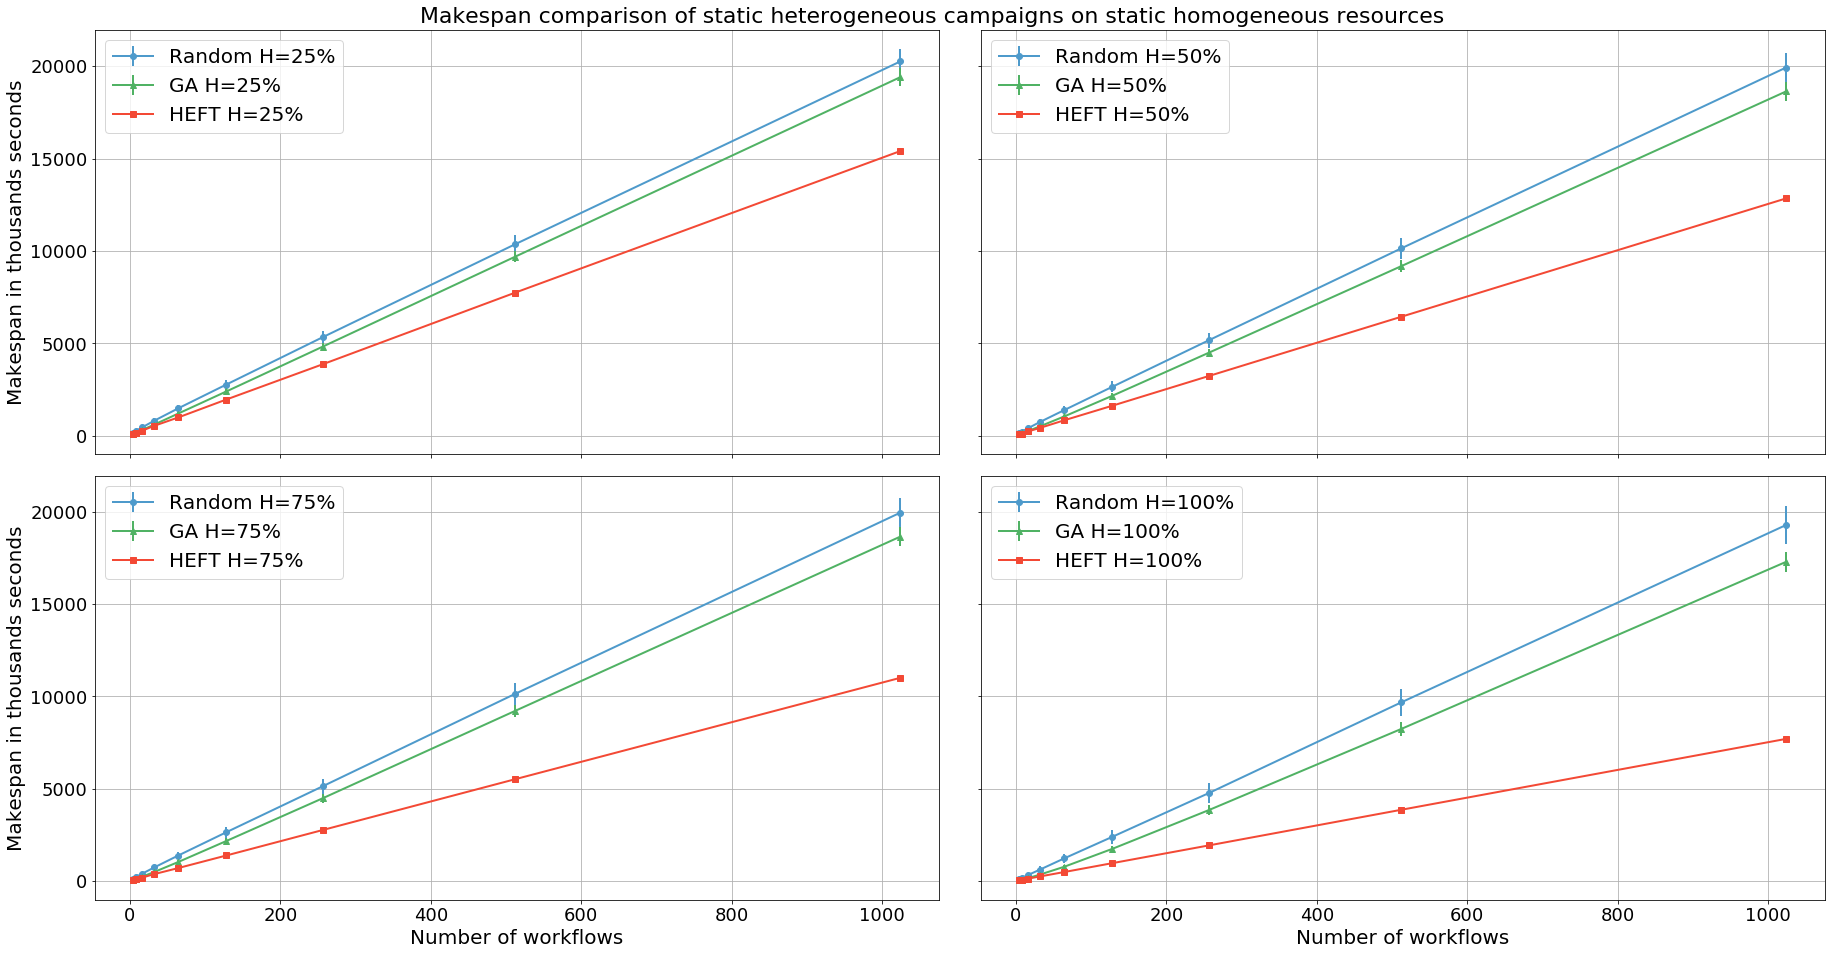

In [17]:
fig,axis = plt.subplots(nrows=2,ncols=2,figsize=(31,16), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.05, hspace=0.05)
_ = axis[0,0].errorbar(StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('RANDOM').index,StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('RANDOM')['makespan'].values,StHeteroCampaigns_4St025HeteroResources_stds.xs('RANDOM')['makespan'].values,color=blues(150),marker='o',label='Random H=25%',linewidth=2)
_ = axis[0,0].errorbar(StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('GA').index, StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('GA')['makespan'].values,StHeteroCampaigns_4St025HeteroResources_stds.xs('GA')['makespan'].values,color=greens(150),marker='^',label='GA H=25%',linewidth=2)
_ = axis[0,0].errorbar(StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('HEFT').index,StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('HEFT')['makespan'].values,marker='s',label='HEFT H=25%', color=reds(150),linewidth=2)

_ = axis[0,1].errorbar(StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('RANDOM').index,StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('RANDOM')['makespan'].values,StHeteroCampaigns_4St050HeteroResources_stds.xs('RANDOM')['makespan'].values,color=blues(150),marker='o',label='Random H=50%',linewidth=2)
_ = axis[0,1].errorbar(StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('GA').index, StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('GA')['makespan'].values,StHeteroCampaigns_4St050HeteroResources_stds.xs('GA')['makespan'].values,color=greens(150),marker='^',label='GA H=50%',linewidth=2)
_ = axis[0,1].errorbar(StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('HEFT').index,StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('HEFT')['makespan'].values,marker='s',label='HEFT H=50%', color=reds(150),linewidth=2)

_ = axis[1,0].errorbar(StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('RANDOM').index,StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('RANDOM')['makespan'].values,StHeteroCampaigns_4St075HeteroResources_stds.xs('RANDOM')['makespan'].values,color=blues(150),marker='o',label='Random H=75%',linewidth=2)
_ = axis[1,0].errorbar(StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('GA').index, StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('GA')['makespan'].values,StHeteroCampaigns_4St075HeteroResources_stds.xs('GA')['makespan'].values,color=greens(150),marker='^',label='GA H=75%',linewidth=2)
_ = axis[1,0].errorbar(StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('HEFT').index,StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('HEFT')['makespan'].values,marker='s',label='HEFT H=75%', color=reds(150),linewidth=2)

_ = axis[1,1].errorbar(StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('RANDOM').index,StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('RANDOM')['makespan'].values,StHeteroCampaigns_4St100HeteroResources_stds.xs('RANDOM')['makespan'].values,color=blues(150),marker='o',label='Random H=100%',linewidth=2)
_ = axis[1,1].errorbar(StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('GA').index, StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('GA')['makespan'].values,StHeteroCampaigns_4St100HeteroResources_stds.xs('GA')['makespan'].values,color=greens(150),marker='^',label='GA H=100%',linewidth=2)
_ = axis[1,1].errorbar(StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('HEFT').index,StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('HEFT')['makespan'].values,marker='s',label='HEFT H=100%', color=reds(150),linewidth=2)


_ = axis[0,0].set_ylabel('Makespan in thousands seconds',fontsize=20)
_ = axis[1,0].set_ylabel('Makespan in thousands seconds',fontsize=20)
_ = axis[1,0].set_xlabel('Number of workflows',fontsize=20)
_ = axis[1,1].set_xlabel('Number of workflows',fontsize=20)
_ = axis[1,0].set_xticklabels(axis[1,0].get_xticks().astype('int').tolist(),fontsize=18)
_ = axis[1,1].set_xticklabels(axis[1,1].get_xticks().astype('int').tolist(),fontsize=18)
_ = axis[0,0].set_yticklabels((axis[0,0].get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis[1,0].set_yticklabels((axis[1,0].get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis[0,0].grid('on')
_ = axis[0,1].grid('on')
_ = axis[1,0].grid('on')
_ = axis[1,1].grid('on')
_ = axis[0,0].legend(fontsize=20)
_ = axis[0,1].legend(fontsize=20)
_ = axis[1,0].legend(fontsize=20)
_ = axis[1,1].legend(fontsize=20)
fig.suptitle('Makespan comparison of static heterogeneous campaigns on static homogeneous resources', fontsize=22, y=0.9)
fig.savefig('StHeteroCampaigns_4StHeteroResources.png',bbox_inches='tight')

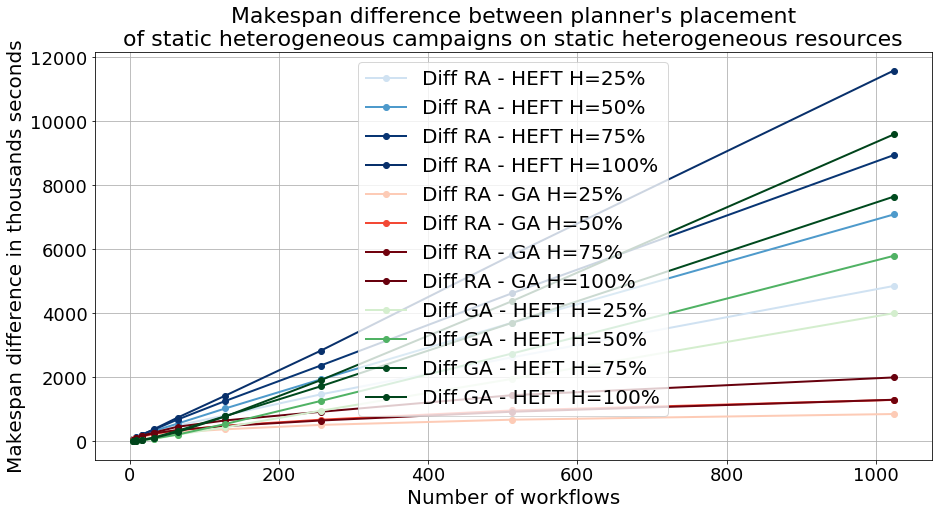

In [18]:
DiffStHeteroCamp_4St025HeteResHE = abs(StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('RANDOM')['makespan'].values - StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('HEFT')['makespan'].values)
DiffStHeteroCamp_4St050HeteResHE = abs(StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('RANDOM')['makespan'].values - StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('HEFT')['makespan'].values)
DiffStHeteroCamp_4St075HeteResHE = abs(StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('RANDOM')['makespan'].values - StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('HEFT')['makespan'].values)
DiffStHeteroCamp_4St100HeteResHE = abs(StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('RANDOM')['makespan'].values - StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('HEFT')['makespan'].values)

DiffStHeteroCamp_4St025HeteResGA = abs(StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('RANDOM')['makespan'].values - StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('GA')['makespan'].values)
DiffStHeteroCamp_4St050HeteResGA = abs(StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('RANDOM')['makespan'].values - StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('GA')['makespan'].values)
DiffStHeteroCamp_4St075HeteResGA = abs(StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('RANDOM')['makespan'].values - StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('GA')['makespan'].values)
DiffStHeteroCamp_4St100HeteResGA = abs(StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('RANDOM')['makespan'].values - StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('GA')['makespan'].values)

DiffStHeteroCamp_4St025HeteResHEGA = (StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('GA')['makespan'].values - StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('HEFT')['makespan'].values)
DiffStHeteroCamp_4St050HeteResHEGA = (StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('GA')['makespan'].values - StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('HEFT')['makespan'].values)
DiffStHeteroCamp_4St075HeteResHEGA = (StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('GA')['makespan'].values - StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('HEFT')['makespan'].values)
DiffStHeteroCamp_4St100HeteResHEGA = (StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('GA')['makespan'].values - StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('HEFT')['makespan'].values)


fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.05, hspace=0.05)
_ = axis.plot(StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St025HeteResHE,marker='o',label='Diff RA - HEFT H=25%',linewidth=2, color=blues(50))
_ = axis.plot(StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St050HeteResHE,marker='o',label='Diff RA - HEFT H=50%',linewidth=2, color=blues(150))
_ = axis.plot(StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St075HeteResHE,marker='o',label='Diff RA - HEFT H=75%',linewidth=2, color=blues(250))
_ = axis.plot(StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St100HeteResHE,marker='o',label='Diff RA - HEFT H=100%',linewidth=2, color=blues(350))

_ = axis.plot(StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St025HeteResGA,marker='o',label='Diff RA - GA H=25%',linewidth=2, color=reds(50))
_ = axis.plot(StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St050HeteResGA,marker='o',label='Diff RA - GA H=50%',linewidth=2, color=reds(150))
_ = axis.plot(StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St075HeteResGA,marker='o',label='Diff RA - GA H=75%',linewidth=2, color=reds(250))
_ = axis.plot(StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St100HeteResGA,marker='o',label='Diff RA - GA H=100%',linewidth=2, color=reds(350))

_ = axis.plot(StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St025HeteResHEGA,marker='o',label='Diff GA - HEFT H=25%',linewidth=2, color=greens(50))
_ = axis.plot(StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St050HeteResHEGA,marker='o',label='Diff GA - HEFT H=50%',linewidth=2, color=greens(150))
_ = axis.plot(StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St075HeteResHEGA,marker='o',label='Diff GA - HEFT H=75%',linewidth=2, color=greens(250))
_ = axis.plot(StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St100HeteResHEGA,marker='o',label='Diff GA - HEFT H=100%',linewidth=2, color=greens(350))

_ = axis.set_ylabel('Makespan difference in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Number of workflows',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis.grid('on')
_ = axis.legend()
_ = axis.legend(fontsize=20)
_ = axis.set_title("Makespan difference between planner's placement\nof static heterogeneous campaigns on static heterogeneous resources", fontsize=22)

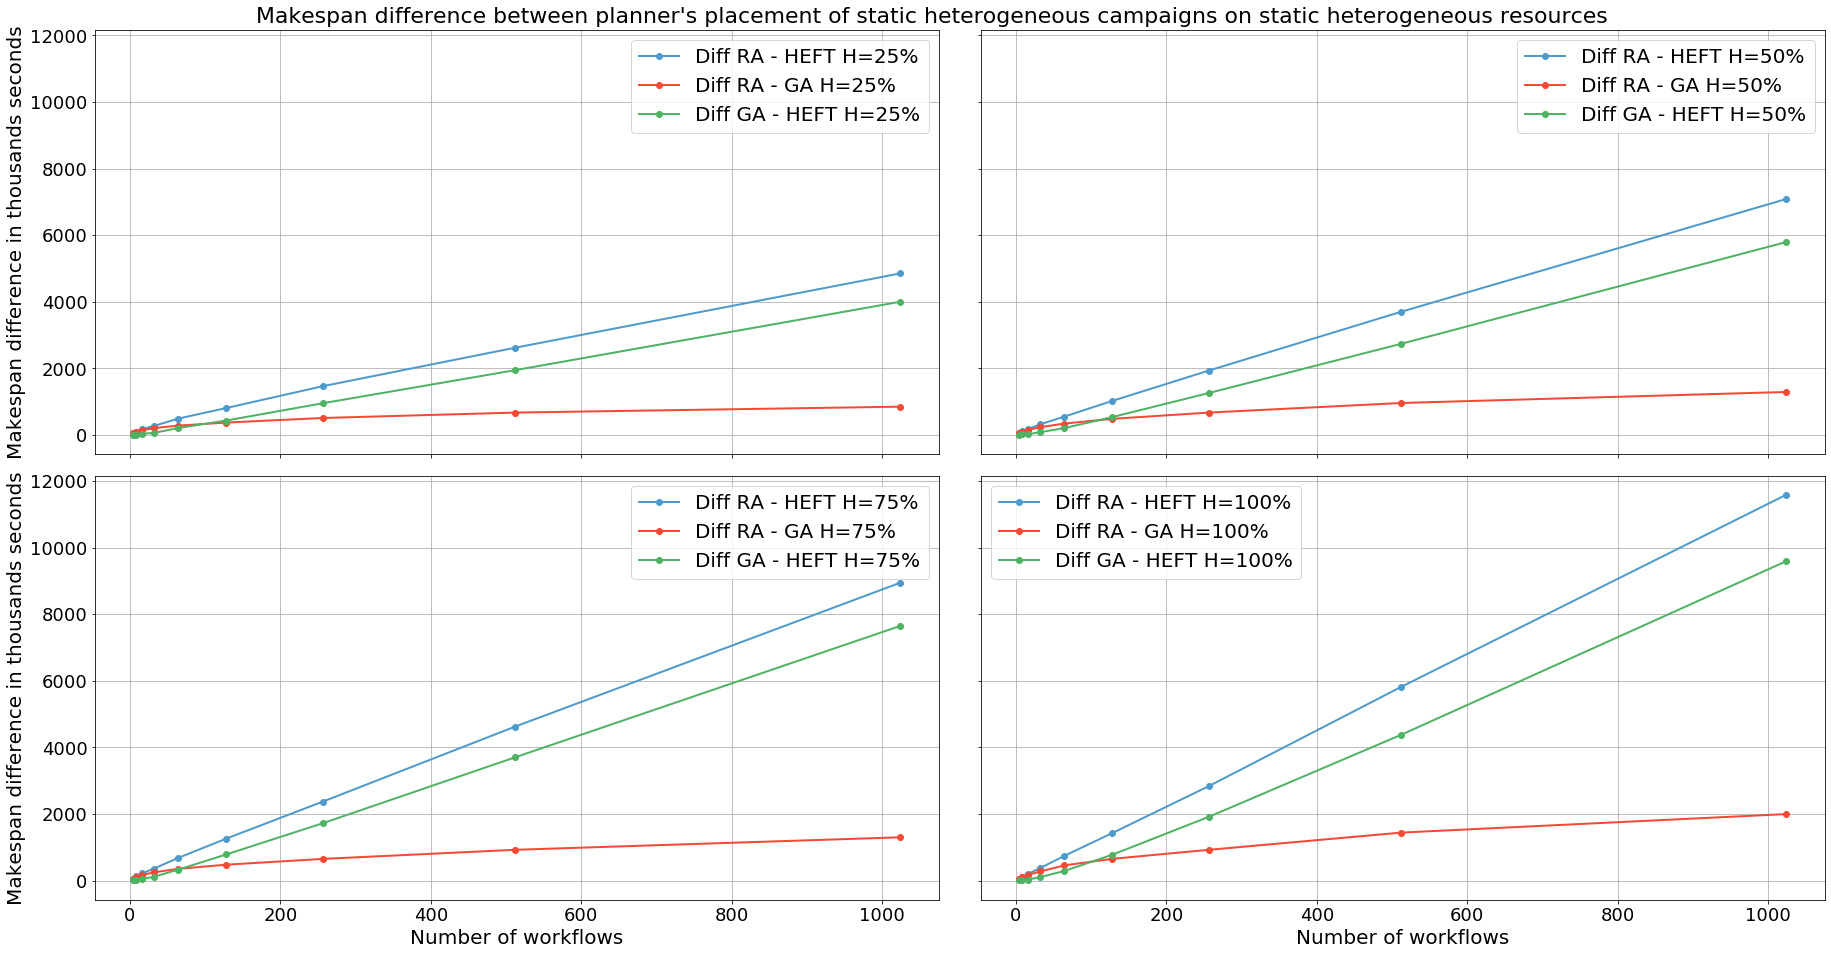

In [19]:
fig,axis = plt.subplots(nrows=2,ncols=2,figsize=(31,16), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.05, hspace=0.05)
_ = axis[0,0].plot(StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St025HeteResHE,marker='o',label='Diff RA - HEFT H=25%',linewidth=2, color=blues(150))
_ = axis[0,1].plot(StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St050HeteResHE,marker='o',label='Diff RA - HEFT H=50%',linewidth=2, color=blues(150))
_ = axis[1,0].plot(StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St075HeteResHE,marker='o',label='Diff RA - HEFT H=75%',linewidth=2, color=blues(150))
_ = axis[1,1].plot(StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St100HeteResHE,marker='o',label='Diff RA - HEFT H=100%',linewidth=2, color=blues(150))

_ = axis[0,0].plot(StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St025HeteResGA,marker='o',label='Diff RA - GA H=25%',linewidth=2, color=reds(150))
_ = axis[0,1].plot(StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St050HeteResGA,marker='o',label='Diff RA - GA H=50%',linewidth=2, color=reds(150))
_ = axis[1,0].plot(StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St075HeteResGA,marker='o',label='Diff RA - GA H=75%',linewidth=2, color=reds(150))
_ = axis[1,1].plot(StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St100HeteResGA,marker='o',label='Diff RA - GA H=100%',linewidth=2, color=reds(150))

_ = axis[0,0].plot(StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St025HeteResHEGA,marker='o',label='Diff GA - HEFT H=25%',linewidth=2, color=greens(150))
_ = axis[0,1].plot(StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St050HeteResHEGA,marker='o',label='Diff GA - HEFT H=50%',linewidth=2, color=greens(150))
_ = axis[1,0].plot(StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St075HeteResHEGA,marker='o',label='Diff GA - HEFT H=75%',linewidth=2, color=greens(150))
_ = axis[1,1].plot(StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St100HeteResHEGA,marker='o',label='Diff GA - HEFT H=100%',linewidth=2, color=greens(150))

_ = axis[0,0].set_ylabel('Makespan difference in thousands seconds',fontsize=20)
_ = axis[1,0].set_ylabel('Makespan difference in thousands seconds',fontsize=20)
_ = axis[1,0].set_xlabel('Number of workflows',fontsize=20)
_ = axis[1,1].set_xlabel('Number of workflows',fontsize=20)
_ = axis[1,0].set_xticklabels(axis[1,0].get_xticks().astype('int').tolist(),fontsize=18)
_ = axis[1,1].set_xticklabels(axis[1,1].get_xticks().astype('int').tolist(),fontsize=18)
_ = axis[0,0].set_yticklabels((axis[0,0].get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis[1,0].set_yticklabels((axis[1,0].get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis[0,0].grid('on')
_ = axis[0,1].grid('on')
_ = axis[1,0].grid('on')
_ = axis[1,1].grid('on')
_ = axis[0,0].legend(fontsize=20)
_ = axis[0,1].legend(fontsize=20)
_ = axis[1,0].legend(fontsize=20)
_ = axis[1,1].legend(fontsize=20)
_ = fig.suptitle("Makespan difference between planner's placement of static heterogeneous campaigns on static heterogeneous resources", fontsize=22,y=0.9)
fig.savefig('StHeteroCampaigns_4StHeteroResources_diff.png',bbox_inches='tight')